<a href="https://colab.research.google.com/github/anjanikumar12345/Exploratory-Data-Analysis---Terrorism-CVIP/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK:5 (CREDIT CARD FRAUD DETECTION)THE GOAL OF THE PROJECT IS TO DEVELOP AND BUILD A MACHINE LEARNING MODEL TO IDENTIFY FRAUDULENT CREDIT CARD TRANSACTIONS.** --> V.ANJANIKUMAR


In [ ]:
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(color_codes = True)
%matplotlib inline

In [ ]:
!pip install pydrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:

file = drive.CreateFile({'id':'1ZcQcLGKEffGwDPGRIbQK9rrQfP-_m_av'})
file.GetContentFile('creditcardfraud.zip')
!unzip creditcardfraud.zip


Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
##Loading the CSV file...
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
##Settiong options
pd.options.display.max_columns = 50
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: >

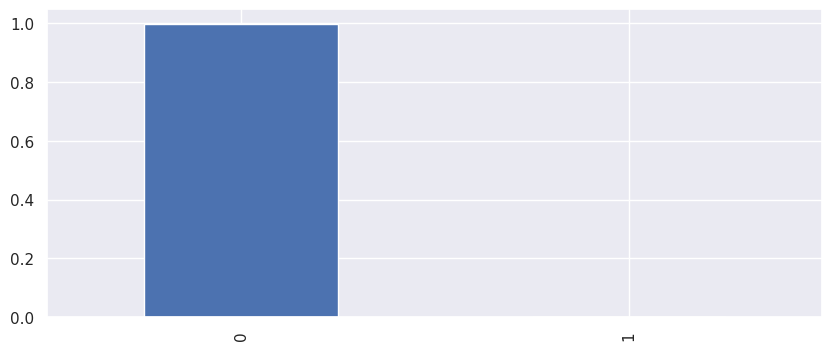

In [ ]:
##Target class distribution..
print(df['Class'].value_counts(normalize = True)*100)
df['Class'].value_counts(normalize = True).plot.bar(figsize = (10,4))


<ipython-input-8-dad7736c5268>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-8-dad7736c5268>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


(0.0, 172792.0)

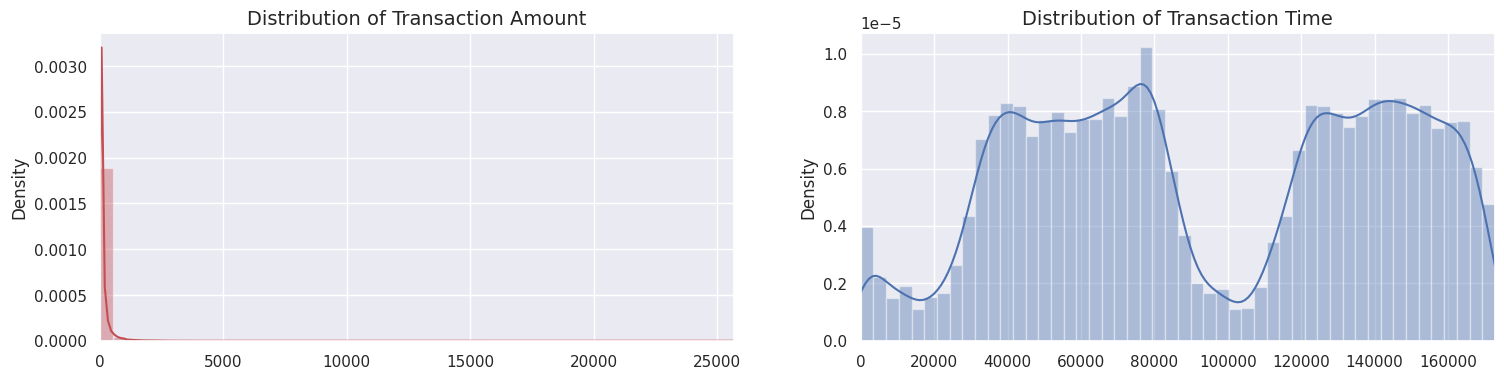

In [ ]:

##Distribution of Transcation time and Transaction amount..
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



In [ ]:

##Scalling time...
df["Time"] = df["Time"].apply(lambda x : x / 3600 % 24)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
##Scaling time and amount..
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.719153,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-1.719153,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.719121,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-1.719121,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.719090,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Designing AutoEncoder.

In [ ]:
##taking only non_fraud cases..
non_fraud = df[df.Class == 0].sample(1000)
fraud = df[df.Class == 1]

print("Shape of non-fraud dataset is {}".format(non_fraud.shape))
print("Shape of fraud dataset is {}".format(fraud.shape))

Shape of non-fraud dataset is (1000, 31)
Shape of fraud dataset is (492, 31)


In [ ]:
import tensorflow as tf
## input layer
input_layer = tf.keras.layers.Input(shape=(X.shape[1],))

## encoding part
encoded = tf.keras.layers.Dense(100, activation='tanh', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_layer)
#encoded = tf.keras.layers.Dropout(0.2)(encoded)
encoded = tf.keras.layers.Dense(50, activation='relu')(encoded)

## decoding part
decoded = tf.keras.layers.Dense(50, activation='tanh')(encoded)
#decoded = tf.keras.layers.Dropout(0.2)(decoded)
decoded = tf.keras.layers.Dense(100, activation='tanh')(decoded)

## output layer
output_layer = tf.keras.layers.Dense(X.shape[1], activation='relu')(decoded)


In [ ]:
autoencoder = tf.keras.Model(input_layer,output_layer)
autoencoder.compile(optimizer = "adam",loss = "mse")

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 100)               5100      
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
Total params: 18830 (73.55 KB)
Trainable params: 18830 (73.55

In [ ]:
##Input for the autoencoder..
x = df.drop(["Class"], axis=1)
y = df["Class"].values

x_norm, x_fraud = x[y == 0], x[y == 1]



In [ ]:
##Fitting our model...
history = autoencoder.fit(x, x,
                batch_size = 512, epochs = 30,
                shuffle = True, validation_split = 0.20)

Epoch 1/30
446/446 [==============================] - 6s 12ms/step - loss: 0.8277 - val_loss: 0.7214
Epoch 2/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6783 - val_loss: 0.6857
Epoch 3/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6505 - val_loss: 0.6780
Epoch 4/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6369 - val_loss: 0.6461
Epoch 5/30
446/446 [==============================] - 4s 9ms/step - loss: 0.6305 - val_loss: 0.6358
Epoch 6/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6237 - val_loss: 0.6352
Epoch 7/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6254 - val_loss: 0.6264
Epoch 8/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6173 - val_loss: 0.6227
Epoch 9/30
446/446 [==============================] - 4s 9ms/step - loss: 0.6163 - val_loss: 0.6431
Epoch 10/30
446/446 [==============================] - 3s 7ms/step - loss: 0.6194 - val_loss: 0.653

**Latent Representations.**

In [ ]:
##getting our latent representations...
hidden_representation = tf.keras.models.Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])


In [ ]:
##getting the prediction..
norm_hid_rep = hidden_representation.predict(x_norm[:4000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

16/16 [==============================] - 0s 3ms/step


In [ ]:
##Visualization..
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)
tsne_plot(rep_x, rep_y)

TypeError: ignored

<Figure size 1200x800 with 1 Axes>

Final supervised Model

In [ ]:
##necessary imports...
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
##Logistic Regression..
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)


from sklearn.metrics import classification_report,accuracy_score
print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       993
         1.0       1.00      0.95      0.97       130

    accuracy                           0.99      1123
   macro avg       1.00      0.97      0.98      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.993766696349065


<Axes: >

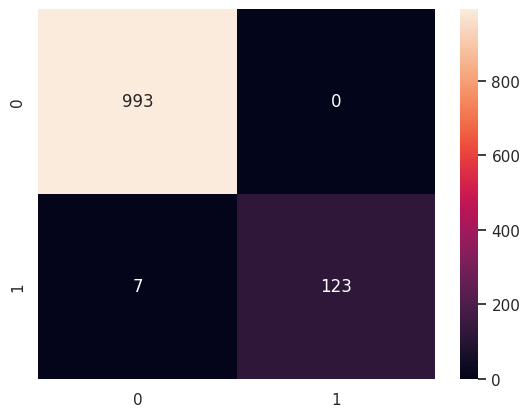

In [ ]:
##Using confusion matrics...
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(val_y,pred_y),annot = True,fmt = 'd')

In [ ]:

##Using Random Forest..
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500,max_depth = 5).fit(train_x,train_y)

pred_rf = rf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_rf))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_rf))



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       993
         1.0       1.00      0.92      0.96       130

    accuracy                           0.99      1123
   macro avg       1.00      0.96      0.98      1123
weighted avg       0.99      0.99      0.99      1123


Accuracy Score:  0.9910952804986642


<Axes: >

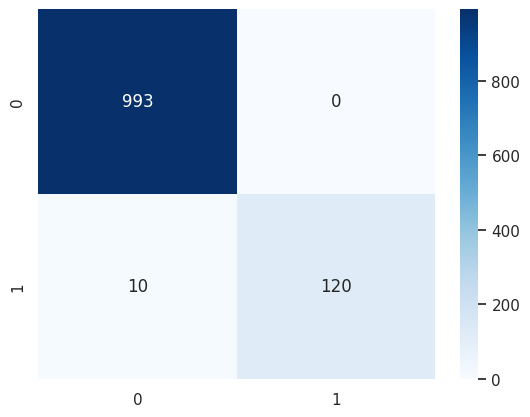

In [ ]:
sns.heatmap(confusion_matrix(val_y,pred_rf),annot = True,fmt = 'd',cmap = 'Blues')

In [ ]:

##using SVM
sv = SVC(kernel = 'rbf').fit(train_x,train_y)

pred_sv = sv.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_sv))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_sv))



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       993
         1.0       1.00      0.96      0.98       130

    accuracy                           1.00      1123
   macro avg       1.00      0.98      0.99      1123
weighted avg       1.00      1.00      1.00      1123


Accuracy Score:  0.9955476402493322


<Axes: >

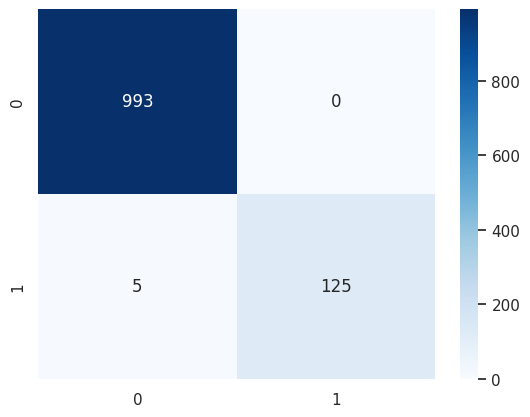

In [ ]:

sns.heatmap(confusion_matrix(val_y,pred_sv),annot = True,fmt = 'd',cmap = 'Blues')

**HYPER-PARAMETER OPTIMIZATION**

In [ ]:
##Using grid-search CV  for SVM
from sklearn.model_selection import GridSearchCV
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
degrees = [2,3]
param_grid = {'C': Cs, 'gamma' : gammas,'degree':degrees}
grid_svc = GridSearchCV(estimator = sv,
                        param_grid = param_grid,
                       scoring = 'recall',
                       cv = 3,
                       verbose = 1)
grid_svc.fit(train_x,train_y)

print(grid_svc.best_params_)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
{'C': 10, 'degree': 2, 'gamma': 0.1}


In [ ]:

##Training SVC with these parameters..
sv_op = SVC(C = 10,degree = 2,kernel = 'rbf',gamma = 0.1).fit(train_x,train_y)
pred_sv_op = sv_op.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_sv_op))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_sv_op))



Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       993
         1.0       0.99      0.98      0.99       130

    accuracy                           1.00      1123
   macro avg       1.00      0.99      0.99      1123
weighted avg       1.00      1.00      1.00      1123


Accuracy Score:  0.9973285841495992
